In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import joblib 


In [58]:
df = pd.read_csv('data/Cyber_security.csv')
df

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,NaN,26.38,NaN,NaN
4,Angola,Africa,NaN,12.99,9.09,22.69
...,...,...,...,...,...,...
187,Venezuela,Africa,0.807,27.06,28.57,43.14
188,Vietnam,Asia-Pasific,NaN,94.59,36.36,47.69
189,Yemen,Asia-Pasific,NaN,NaN,7.79,NaN
190,Zambia,Africa,0.745,68.88,55.84,29.66


CEI = 사이버 보안 노출지수, GCI= 글로벌 사이버 보안지수, NCSI = 국가 사이버 보안지수 , DDL = 디지털 개발수준

In [111]:
df2 = pd.read_csv('data/countries-of-the-world.csv')
df2 = df2.drop('Region', axis=1)
df2 = df2.drop('Agriculture', axis=1)
df2


,Country,Population,Area (sq. mi.),Pop. Density (per sq. mi.),GDP ($ per capita),Phones (per 1000),Birthrate,Deathrate
0,Afghanistan,31056997,647500,"48,0",700.0,"3,2","46,6","20,34"
1,Albania,3581655,28748,"124,6",4500.0,"71,2","15,11","5,22"
2,Algeria,32930091,2381740,"13,8",6000.0,"78,1","17,14","4,61"
3,American Samoa,57794,199,"290,4",8000.0,"259,5","22,46","3,27"
4,Andorra,71201,468,"152,1",19000.0,"497,2","8,71","6,25"
...,...,...,...,...,...,...,...,...
222,West Bank,2460492,5860,"419,9",800.0,"145,2","31,67","3,92"
223,Western Sahara,273008,266000,"1,0",NaN,NaN,NaN,NaN
224,Yemen,21456188,527970,"40,6",800.0,"37,2","42,89","8,3"
225,Zambia,11502010,752614,"15,3",800.0,"8,2",41,"19,93"


In [60]:
df3 = pd.merge(df, df2, on = 'Country', how='left')

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192 entries, 0 to 191
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  192 non-null    object 
 1   Region   192 non-null    object 
 2   CEI      108 non-null    float64
 3   GCI      190 non-null    float64
 4   NCSI     167 non-null    float64
 5   DDL      152 non-null    float64
dtypes: float64(4), object(2)
memory usage: 9.1+ KB


In [62]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Country                     227 non-null    object 
 1   Population                  227 non-null    int64  
 2   Area (sq. mi.)              227 non-null    int64  
 3   Pop. Density (per sq. mi.)  227 non-null    object 
 4   GDP ($ per capita)          226 non-null    float64
 5   Agriculture                 209 non-null    object 
 6   Phones (per 1000)           223 non-null    object 
 7   Birthrate                   224 non-null    object 
 8   Deathrate                   223 non-null    object 
dtypes: float64(1), int64(2), object(6)
memory usage: 16.1+ KB


In [63]:
df['Country'] = df['Country'].str.strip()
df2['Country'] = df2['Country'].str.strip()

df['Country'] = df['Country'].str.upper()
df2['Country'] = df2['Country'].str.upper()

df['Country'] = df['Country'].replace('United States', 'USA')
df2['Country'] = df2['Country'].replace('United States', 'USA')

In [64]:

df3 = pd.merge(df, df2, on='Country', how='left')

In [65]:
df3

,Country,Region,CEI,GCI,NCSI,DDL,Population,Area (sq. mi.),Pop. Density (per sq. mi.),GDP ($ per capita),Agriculture,Phones (per 1000),Birthrate,Deathrate
0,AFGHANISTAN,Asia-Pasific,1.000,5.20,11.69,19.50,31056997.0,647500.0,"48,0",700.0,"36,0","3,2","46,6","20,34"
1,ALBANIA,Europe,0.566,64.32,62.34,48.74,3581655.0,28748.0,"124,6",4500.0,"86,5","71,2","15,11","5,22"
2,ALGERIA,Africa,0.721,33.95,33.77,42.81,32930091.0,2381740.0,"13,8",6000.0,"70,0","78,1","17,14","4,61"
3,ANDORRA,Europe,NaN,26.38,NaN,NaN,71201.0,468.0,"152,1",19000.0,"100,0","497,2","8,71","6,25"
4,ANGOLA,Africa,NaN,12.99,9.09,22.69,12127071.0,1246700.0,"9,7",1900.0,"42,0","7,8","45,11","24,2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VENEZUELA,Africa,0.807,27.06,28.57,43.14,25730435.0,912050.0,"28,2",4800.0,"93,4","140,1","18,71","4,92"
188,VIETNAM,Asia-Pasific,NaN,94.59,36.36,47.69,84402966.0,329560.0,"256,1",2500.0,"90,3","187,7","16,86","6,22"
189,YEMEN,Asia-Pasific,NaN,NaN,7.79,NaN,21456188.0,527970.0,"40,6",800.0,"50,2","37,2","42,89","8,3"
190,ZAMBIA,Africa,0.745,68.88,55.84,29.66,11502010.0,752614.0,"15,3",800.0,"80,6","8,2",41,"19,93"


Population =인구	Area (sq. mi.) =면적	Pop. Density (per sq. mi.) = 면적당 인구밀도	GDP ($ per capita)	Phones (per 1000) = 폰 보급	Birthrate	Deathrate

In [66]:
df.isna()

,Country,Region,CEI,GCI,NCSI,DDL
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,True,False,True,True
4,False,False,True,False,False,False
...,...,...,...,...,...,...
187,False,False,False,False,False,False
188,False,False,True,False,False,False
189,False,False,True,True,False,True
190,False,False,False,False,False,False


In [67]:
df = df.dropna()

df

,Country,Region,CEI,GCI,NCSI,DDL
0,AFGHANISTAN,Asia-Pasific,1.000,5.20,11.69,19.50
1,ALBANIA,Europe,0.566,64.32,62.34,48.74
2,ALGERIA,Africa,0.721,33.95,33.77,42.81
6,ARGENTINA,South America,0.514,50.12,63.64,60.43
7,ARMENIA,Europe,0.655,50.47,35.06,55.06
...,...,...,...,...,...,...
183,URUGUAY,South America,0.348,75.15,59.74,63.86
184,UZBEKISTAN,Asia-Pasific,0.721,71.11,36.36,49.00
187,VENEZUELA,Africa,0.807,27.06,28.57,43.14
190,ZAMBIA,Africa,0.745,68.88,55.84,29.66


In [68]:
df3

,Country,Region,CEI,GCI,NCSI,DDL,Population,Area (sq. mi.),Pop. Density (per sq. mi.),GDP ($ per capita),Agriculture,Phones (per 1000),Birthrate,Deathrate
0,AFGHANISTAN,Asia-Pasific,1.000,5.20,11.69,19.50,31056997.0,647500.0,"48,0",700.0,"36,0","3,2","46,6","20,34"
1,ALBANIA,Europe,0.566,64.32,62.34,48.74,3581655.0,28748.0,"124,6",4500.0,"86,5","71,2","15,11","5,22"
2,ALGERIA,Africa,0.721,33.95,33.77,42.81,32930091.0,2381740.0,"13,8",6000.0,"70,0","78,1","17,14","4,61"
3,ANDORRA,Europe,NaN,26.38,NaN,NaN,71201.0,468.0,"152,1",19000.0,"100,0","497,2","8,71","6,25"
4,ANGOLA,Africa,NaN,12.99,9.09,22.69,12127071.0,1246700.0,"9,7",1900.0,"42,0","7,8","45,11","24,2"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,VENEZUELA,Africa,0.807,27.06,28.57,43.14,25730435.0,912050.0,"28,2",4800.0,"93,4","140,1","18,71","4,92"
188,VIETNAM,Asia-Pasific,NaN,94.59,36.36,47.69,84402966.0,329560.0,"256,1",2500.0,"90,3","187,7","16,86","6,22"
189,YEMEN,Asia-Pasific,NaN,NaN,7.79,NaN,21456188.0,527970.0,"40,6",800.0,"50,2","37,2","42,89","8,3"
190,ZAMBIA,Africa,0.745,68.88,55.84,29.66,11502010.0,752614.0,"15,3",800.0,"80,6","8,2",41,"19,93"


In [69]:
df3.loc[df3['Country']== 'KOREA']

,Country,Region,CEI,GCI,NCSI,DDL,Population,Area (sq. mi.),Pop. Density (per sq. mi.),GDP ($ per capita),Agriculture,Phones (per 1000),Birthrate,Deathrate


In [70]:
df_usa = df.loc[df['Country'] == 'ZIMBABWE']

In [71]:
df_usa

,Country,Region,CEI,GCI,NCSI,DDL
191,ZIMBABWE,Africa,0.724,36.49,15.58,28.97


In [72]:
df.loc[df['Country'] == 'United States', 'Country'] = 'America'

In [73]:
df3.columns

Index(['Country', 'Region', 'CEI', 'GCI', 'NCSI', 'DDL', 'Population',
       'Area (sq. mi.)', 'Pop. Density (per sq. mi.)', 'GDP ($ per capita)',
       'Agriculture', 'Phones (per 1000)', 'Birthrate', 'Deathrate'],
      dtype='object')

In [74]:

df3.rename(columns={'Population':'인구', 'Pop. Density (per sq. mi.)': '면적당 인구밀도', 'Area (sq. mi.)' : '국가 면적(mi)','GDP ($ per capita)': 'GDP',  'Phones (per 1000)':'폰 보급률', 'Birthrate':'출생', 'Deathrate' : '사망'}, inplace=True)

#CEI = 사이버 보안 노출지수, GCI= 글로벌 사이버 보안지수, NCSI = 국가 사이버 보안지수 , DDL = 디지털 개발수준


In [75]:
df3 = df3.dropna()

In [76]:
df3 = df3.drop('NCSI', axis=1)

In [77]:
df3 = df3.drop('Agriculture', axis=1)

In [78]:
df3

,Country,Region,CEI,GCI,DDL,인구,국가 면적(mi),면적당 인구밀도,GDP,폰 보급률,출생,사망
0,AFGHANISTAN,Asia-Pasific,1.000,5.20,19.50,31056997.0,647500.0,"48,0",700.0,"3,2","46,6","20,34"
1,ALBANIA,Europe,0.566,64.32,48.74,3581655.0,28748.0,"124,6",4500.0,"71,2","15,11","5,22"
2,ALGERIA,Africa,0.721,33.95,42.81,32930091.0,2381740.0,"13,8",6000.0,"78,1","17,14","4,61"
6,ARGENTINA,South America,0.514,50.12,60.43,39921833.0,2766890.0,"14,4",11200.0,"220,4","16,73","7,55"
7,ARMENIA,Europe,0.655,50.47,55.06,2976372.0,29800.0,"99,9",3500.0,"195,7","12,07","8,23"
...,...,...,...,...,...,...,...,...,...,...,...,...
183,URUGUAY,South America,0.348,75.15,63.86,3431932.0,176220.0,"19,5",12800.0,"291,4","13,91","9,05"
184,UZBEKISTAN,Asia-Pasific,0.721,71.11,49.00,27307134.0,447400.0,"61,0",1700.0,"62,9","26,36","7,84"
187,VENEZUELA,Africa,0.807,27.06,43.14,25730435.0,912050.0,"28,2",4800.0,"140,1","18,71","4,92"
190,ZAMBIA,Africa,0.745,68.88,29.66,11502010.0,752614.0,"15,3",800.0,"8,2",41,"19,93"


In [79]:
df3.to_csv('df3.csv')

In [80]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 191
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    97 non-null     object 
 1   Region     97 non-null     object 
 2   CEI        97 non-null     float64
 3   GCI        97 non-null     float64
 4   DDL        97 non-null     float64
 5   인구         97 non-null     float64
 6   국가 면적(mi)  97 non-null     float64
 7   면적당 인구밀도   97 non-null     object 
 8   GDP        97 non-null     float64
 9   폰 보급률      97 non-null     object 
 10  출생         97 non-null     object 
 11  사망         97 non-null     object 
dtypes: float64(6), object(6)
memory usage: 9.9+ KB


In [81]:

df3['면적당 인구밀도'] = df3['면적당 인구밀도'].str.replace(',', '').astype(float)


In [84]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97 entries, 0 to 191
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Country    97 non-null     object 
 1   Region     97 non-null     object 
 2   CEI        97 non-null     float64
 3   GCI        97 non-null     float64
 4   DDL        97 non-null     float64
 5   인구         97 non-null     float64
 6   국가 면적(mi)  97 non-null     float64
 7   면적당 인구밀도   97 non-null     float64
 8   GDP        97 non-null     float64
 9   폰 보급률      97 non-null     object 
 10  출생         97 non-null     float64
 11  사망         97 non-null     float64
dtypes: float64(9), object(3)
memory usage: 9.9+ KB


In [98]:
df3['폰 보급률'] = df3['폰 보급률'].str.replace(',', '').astype(float)

#CEI = 사이버 보안 노출지수, GCI= 글로벌 사이버 보안지수, NCSI = 국가 사이버 보안지수 , DDL = 디지털 개발수준


In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

In [87]:
import matplotlib.font_manager as fm


In [99]:
plt.rcParams['font.family'] = 'Malgun Gothic' #그래프에 한글 출력

In [101]:
correlation_matrix = df3.iloc[:, 2:].corr()

c:\Users\405\anaconda3\envs\app_dash\lib\site-packages\seaborn\utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
C:\Users\405\AppData\Roaming\Python\Python39\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


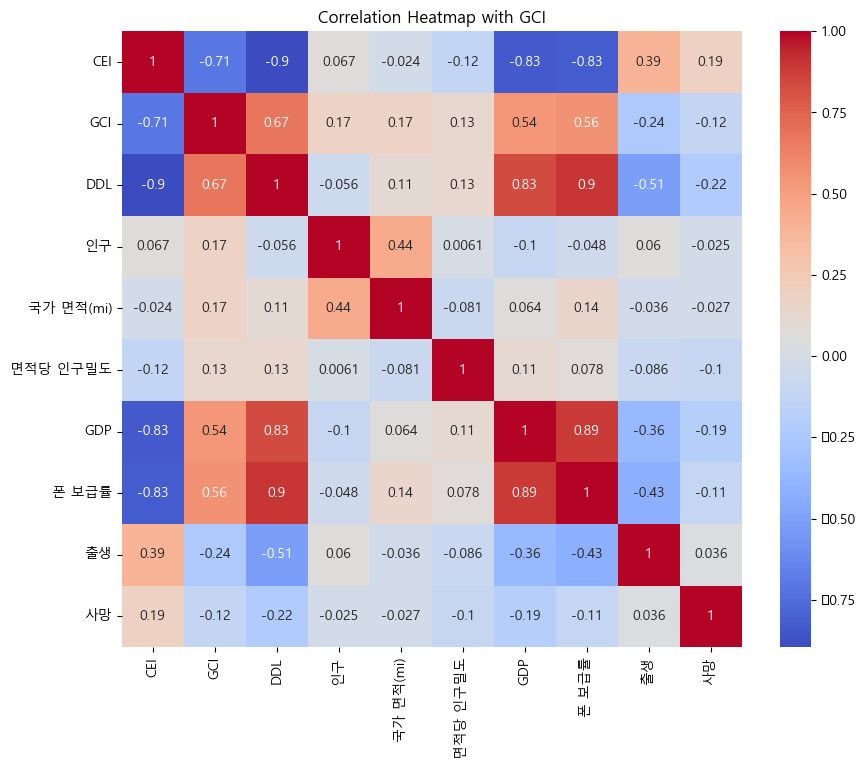

In [102]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap with GCI')
plt.show()

In [104]:
df3 = df3.dropna()

In [105]:
df3

,Country,Region,CEI,GCI,DDL,인구,국가 면적(mi),면적당 인구밀도,GDP,폰 보급률,출생,사망
0,AFGHANISTAN,Asia-Pasific,1.000,5.20,19.50,31056997.0,647500.0,480.0,700.0,32.0,466.0,2034.0
1,ALBANIA,Europe,0.566,64.32,48.74,3581655.0,28748.0,1246.0,4500.0,712.0,1511.0,522.0
2,ALGERIA,Africa,0.721,33.95,42.81,32930091.0,2381740.0,138.0,6000.0,781.0,1714.0,461.0
6,ARGENTINA,South America,0.514,50.12,60.43,39921833.0,2766890.0,144.0,11200.0,2204.0,1673.0,755.0
7,ARMENIA,Europe,0.655,50.47,55.06,2976372.0,29800.0,999.0,3500.0,1957.0,1207.0,823.0
...,...,...,...,...,...,...,...,...,...,...,...,...
183,URUGUAY,South America,0.348,75.15,63.86,3431932.0,176220.0,195.0,12800.0,2914.0,1391.0,905.0
184,UZBEKISTAN,Asia-Pasific,0.721,71.11,49.00,27307134.0,447400.0,610.0,1700.0,629.0,2636.0,784.0
187,VENEZUELA,Africa,0.807,27.06,43.14,25730435.0,912050.0,282.0,4800.0,1401.0,1871.0,492.0
190,ZAMBIA,Africa,0.745,68.88,29.66,11502010.0,752614.0,153.0,800.0,82.0,41.0,1993.0


In [93]:
df3.loc[df3['Country']=='ICELAND', ]

,Country,Region,CEI,GCI,DDL,인구,국가 면적(mi),면적당 인구밀도,GDP,폰 보급률,출생,사망
74,ICELAND,Europe,0.348,79.81,78.64,299388.0,103000.0,29.0,30900.0,"647,7",1364.0,672.0


In [108]:
df3.iloc[:, 2:].corrwith(df3['GCI'])


CEI         -0.710630
GCI          1.000000
DDL          0.674173
인구           0.171343
국가 면적(mi)    0.174264
면적당 인구밀도     0.129560
GDP          0.535812
폰 보급률        0.558231
출생          -0.243383
사망          -0.115443
dtype: float64

In [114]:
df3.iloc[:, 2:].corrwith(df3['GDP'])

CEI         -0.834436
GCI          0.535812
DDL          0.830109
인구          -0.101879
국가 면적(mi)    0.063864
면적당 인구밀도     0.113279
GDP          1.000000
폰 보급률        0.885710
출생          -0.357575
사망          -0.192618
dtype: float64

In [115]:
df3.describe()

,CEI,GCI,DDL,인구,국가 면적(mi),면적당 인구밀도,GDP,폰 보급률,출생,사망
count,97.000000,97.000000,97.000000,9.700000e+01,9.700000e+01,97.000000,97.000000,97.000000,97.000000,97.000000
mean,0.466649,73.865670,56.674845,5.863050e+07,1.130662e+06,1741.226804,12062.886598,2497.711340,1573.865979,845.257732
std,0.216872,27.145541,17.023765,1.757870e+08,2.602862e+06,6622.095435,11344.871451,2069.282323,963.977034,439.118821
min,0.110000,2.200000,19.500000,2.993880e+05,6.930000e+02,18.000000,600.000000,26.000000,16.000000,22.000000
25%,0.269000,63.720000,43.140000,5.231372e+06,7.886600e+04,293.000000,3400.000000,712.000000,968.000000,541.000000
50%,0.483000,82.410000,58.290000,1.223680e+07,3.000000e+05,669.000000,7200.000000,1969.000000,1387.000000,818.000000
75%,0.621000,96.250000,69.740000,3.992183e+07,8.254180e+05,1265.000000,20000.000000,4114.000000,2159.000000,1031.000000
max,1.000000,100.000000,82.930000,1.313974e+09,1.707520e+07,64822.000000,55100.000000,8980.000000,4735.000000,2184.000000


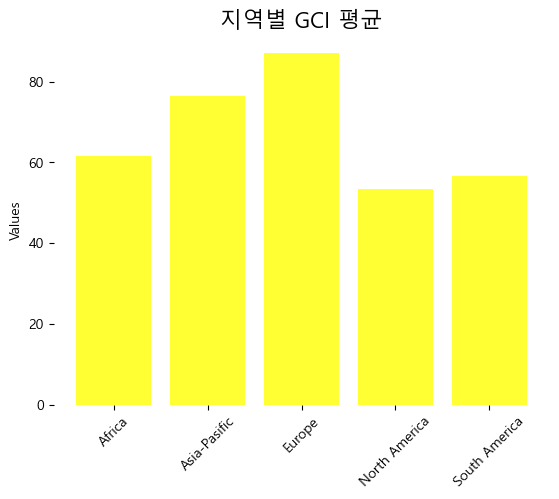

In [125]:
mean_GCI = df3.groupby('Region')['GCI'].mean()
fig, ax = plt.subplots(1, 1)
ax.set_title('지역별 GCI 평균', size=16)
ax.bar(mean_GCI.index, mean_GCI.values, color='#FFFF00', alpha=0.8)
ax.set(ylabel='Values')
plt.xticks(rotation = 45)
for ax, spine in ax.spines.items():
    spine.set_visible(False)
plt.show()

Text(0, 0.5, 'GDP')

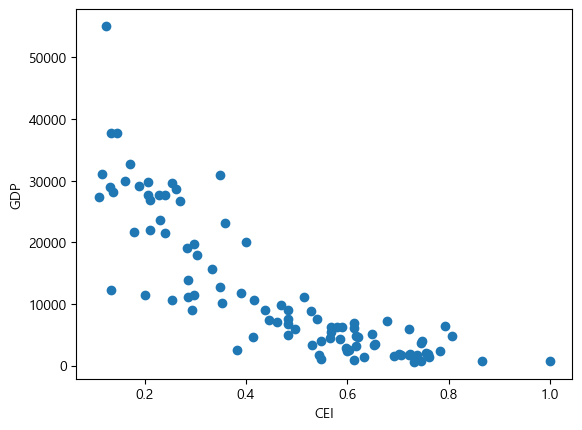

In [127]:
plt.scatter(df3['CEI'], df3['GDP'])
plt.xlabel('CEI')
plt.ylabel('GDP')

In [131]:
good =  df3.sort_values(['GDP', 'CEI', 'GCI'], ascending=[False,True,True])
good['Rank'] = range(1, len(good) + 1)
good



,Country,Region,CEI,GCI,DDL,인구,국가 면적(mi),면적당 인구밀도,GDP,폰 보급률,출생,사망,Rank
98,LUXEMBOURG,Europe,0.124,97.41,78.40,474413.0,2586.0,1835.0,55100.0,5154.0,1194.0,841.0,1
126,NORWAY,Europe,0.134,96.89,80.19,4610820.0,323802.0,142.0,37800.0,4617.0,1146.0,94.0,2
182,UNITED STATES,North America,0.145,100.00,81.05,298444215.0,9631420.0,310.0,37800.0,8980.0,1414.0,826.0,3
165,SWITZERLAND,Europe,0.172,86.97,82.93,7523934.0,41290.0,1822.0,32700.0,6809.0,971.0,849.0,4
45,DENMARK,Europe,0.117,92.60,82.68,5450661.0,43094.0,1265.0,31100.0,6146.0,1113.0,1036.0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,NIGERIA,Africa,0.614,84.76,31.76,131859731.0,923768.0,1427.0,900.0,93.0,4043.0,1694.0,93
190,ZAMBIA,Africa,0.745,68.88,29.66,11502010.0,752614.0,153.0,800.0,82.0,41.0,1993.0,94
56,ETHIOPIA,Africa,0.866,27.74,20.70,74777981.0,1127127.0,663.0,700.0,82.0,3798.0,1486.0,95
0,AFGHANISTAN,Asia-Pasific,1.000,5.20,19.50,31056997.0,647500.0,480.0,700.0,32.0,466.0,2034.0,96
